In [2]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
image_path = r"../dip_Images/"

In [3]:
#My util functions
def show(image,window_name="Window"):
  cv2.imshow(window_name,image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  return

def invert(image):
  nega_image = image.copy()
  nega_image = 255 - image # As image is a numpy array of type uint8, max value of pixel is 255
  return nega_image

def log_transform(image):
  new = image.copy()
  mask = image==0
  mask.astype(np.uint8) # create a mask to remove 0 values as log(0) -> -inf
  new = new + mask
  scale = 255/np.log(1+np.max(image))
  new = scale*np.log(new)
  new = np.asarray(new,np.uint8)
  return new

def gamma(r,image):
  new = image.copy()
  new = np.array(255*((image/255)**r),dtype=np.uint8)
  return new

def flip(image,orientation):
  new = image.copy()
  if orientation == 'h':
    new = cv2.flip(new,1)
  if orientation == 'v':
    new = cv2.flip(new,0)
  return new

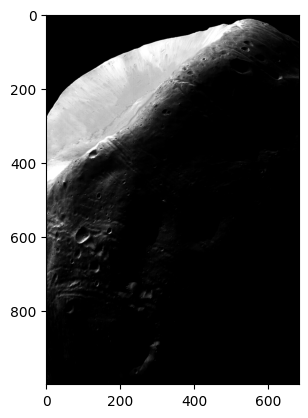

In [4]:

#Loads and display image
sample_image = cv2.imread(image_path+"Fig0323(a)(mars_moon_phobos).tif",0)
window_name = "sample"
show(sample_image,window_name)
plt.imshow(sample_image,cmap='gray')


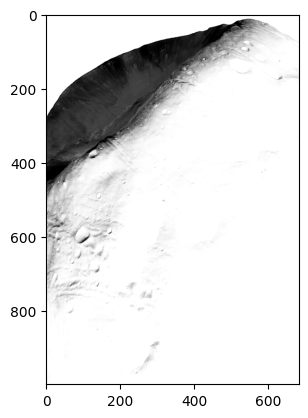

In [14]:
#negative image
nega_image = invert(sample_image)
show(nega_image)
plt.imshow(nega_image,cmap='gray')

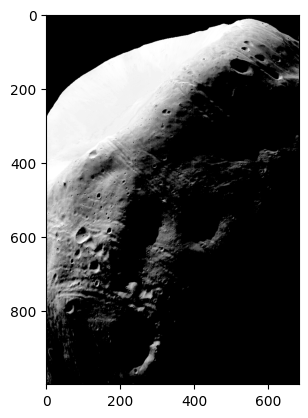

In [5]:
#log transform
log_image = log_transform(sample_image)
show(log_image)
plt.imshow(log_image,cmap='gray')

In [9]:
gamma_images=[]
gamma_values = [0.04,0.1,0.2,0.4,0.67,1,1.5,2.5,5]
for gamma_vals in gamma_values:
  new = gamma(gamma_vals,sample_image)
  gamma_images.append(new)

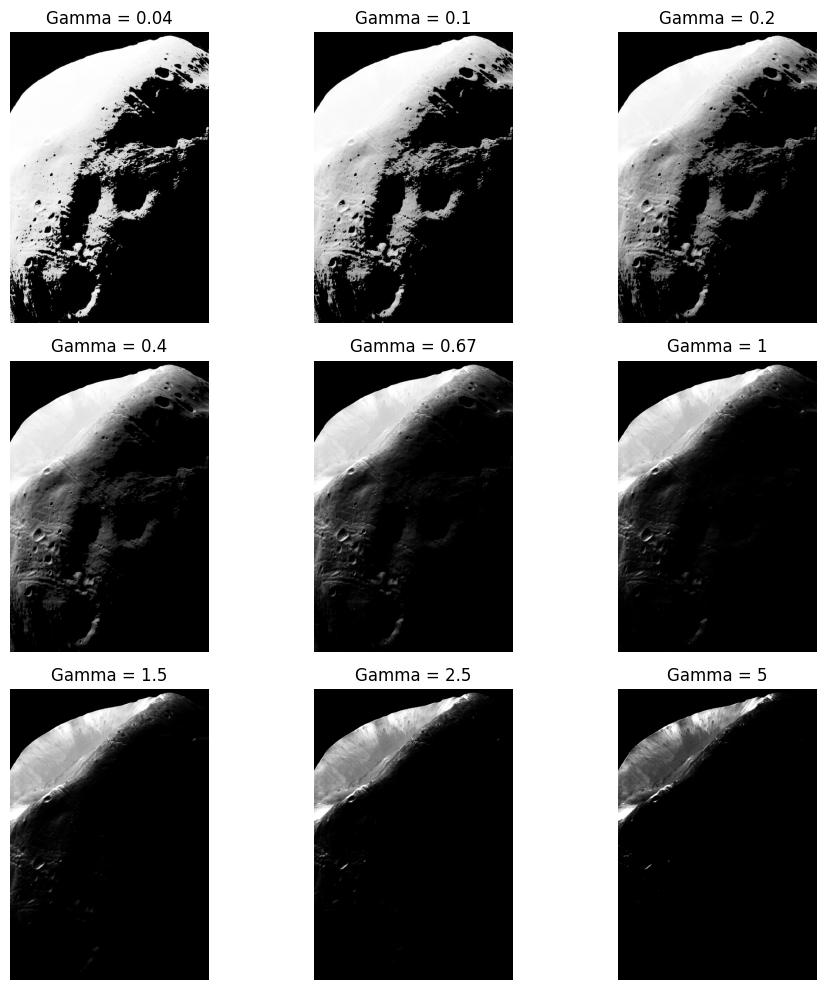

In [10]:
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        axes[i, j].imshow(gamma_images[index], cmap='gray')
        axes[i, j].set_title(f'Gamma = {gamma_values[index]}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

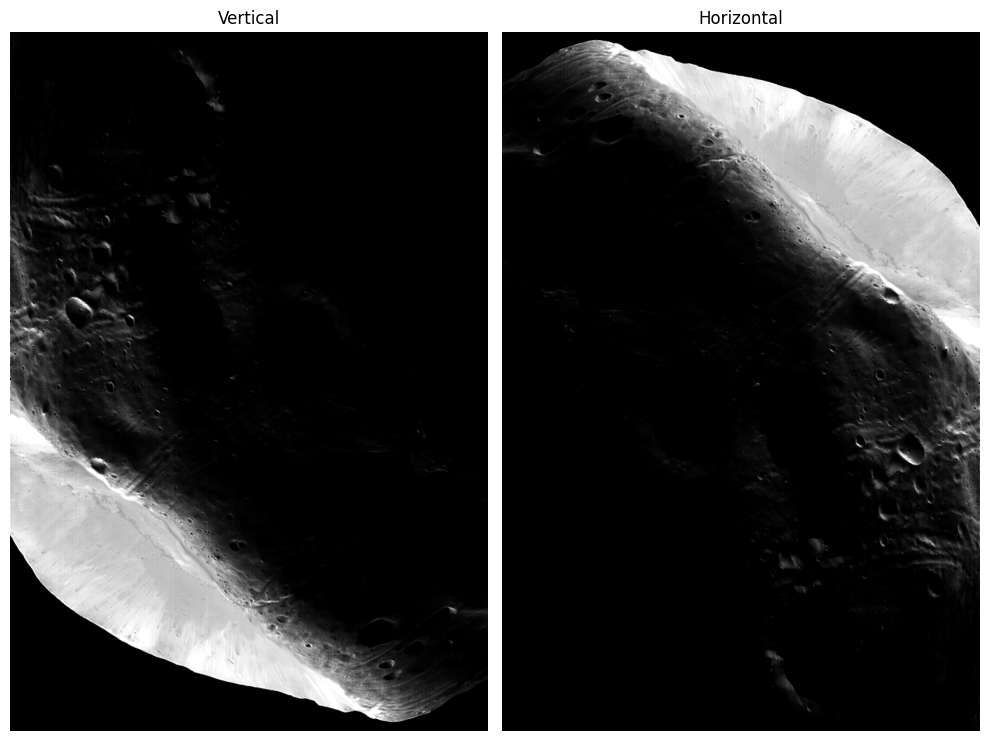

In [9]:
#Image flip
rows = 1
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes[0].imshow(flip(sample_image,'v'), cmap='gray')
axes[0].set_title('Vertical')
axes[0].axis('off')


axes[1].imshow(flip(sample_image,'h'), cmap='gray')
axes[1].set_title('Horizontal')
axes[1].axis('off')



plt.tight_layout()
plt.show()

In [94]:
def weightedAvgFilter(img:np.ndarray = None, 
                      path: str = "", 
                      filter_size:int = 3, 
                      sigma:int = 1,
                      show:bool = False, 
                      height:int = 10, 
                      width:int = 8,
                      CONSTANT=255  ):  
    """
    Apply a weighted average filter to the input image.

    Parameters:
    - image (np.ndarray): Input image (grayscale).
    - image_path (str): Path to the input image file (if 'image' is not provided).
    - filter_size (int, optional): Size of the box filter. Should be an odd number for best results.
    - show_result (bool): If True, display the original and filtered images.
    - figure_height (int): Height of the Matplotlib figure (if 'show_result' is True).
    - figure_width (int): Width of the Matplotlib figure (if 'show_result' is True).
    - CONSTANT: Value to add in padding

    Returns:
    - np.ndarray: Filtered image.

    If 'image' is not provided and 'image_path' is specified, it loads the image from the path.
    The weighted average filter is applied to the image using a 3x3 filter kernel.
    If 'show_result' is True, the original and filtered images are displayed using Matplotlib.
    """
    if img is None:
        img = imRead(path)
        if img is None:
            return img
    
    filter = np.empty((filter_size,filter_size))
    sum_filter = 0
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size//2
            y = j - filter_size//2
            value = 2**(-(x*x+y*y)/(sigma**2))
            filter[i][j] = value
            sum_filter += value
    filter = filter/sum_filter

    rows, cols = img.shape
    pad_width = filter_size//2
    img1 = np.pad(img, pad_width=pad_width, mode='constant', constant_values=CONSTANT)
    filtered_img = np.zeros_like(img)
    for row in range(rows):
        for col in range(cols):
            replace = np.round(np.sum(img1[row:row+filter_size, col:col+filter_size] * filter))
            filtered_img[row,col]=  replace
    if show:
        plt.figure(figsize=(height, width))
        imShow("Original Image",img, subplot=True, row=2,col=1, num=1)
        imShow("Weighted Avg Filter",filtered_img,subplot=True, row=2,col=1, num=2)
        plt.show()  
        
    return filtered_img



In [90]:
test = cv2.imread(image_path+"Fig0333(a)(test_pattern_blurring_orig).tif",0)


In [97]:
filtered_image1 = weightedAvgFilter(img=test,sigma=1,filter_size=3)
filtered_image2 = weightedAvgFilter(img=test,sigma=4,filter_size=3)
show(filtered_image1)
show(filtered_image2)
show(test)


In [50]:
filter_size = 5
sigma = 4
filter = np.empty((filter_size,filter_size))
sum_filter = 0
for i in range(filter_size):
    for j in range(filter_size):
        x = i - filter_size//2
        y = j - filter_size//2
        value = 2**(-(x*x+y*y)/(sigma**2))
        filter[i][j] = value
        sum_filter += value
filter = filter/sum_filter
print(filter)

[[0.03346078 0.03810476 0.0397918  0.03810476 0.03346078]
 [0.03810476 0.04339327 0.04531445 0.04339327 0.03810476]
 [0.0397918  0.04531445 0.04732069 0.04531445 0.0397918 ]
 [0.03810476 0.04339327 0.04531445 0.04339327 0.03810476]
 [0.03346078 0.03810476 0.0397918  0.03810476 0.03346078]]
